<a href="https://colab.research.google.com/github/AthirahFauzi02/Restaurant_Recommendation_System_for_UMStudent/blob/main/Restaurant_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RESTAURANT RECOMMENDATION SYSTEM
Welcome! This system is used to recommend the restaurant that you should go if you ever feel like you don't know where to eat.

HOW TO USE:
- When you just connected/reconnected to the server, run all sections.
- If you want to try other location(s), just run these 3 sections: USER INPUT, RULES, OUTPUT

In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=afb78fe93223f1f7bbda627413cd7e2d4e8930af333e408e4d66228479766ada
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## USER INPUT

In [ ]:
#Welcoming screen
print("Welcome\nDon't know what to eat? Let me help you! First, let me know where you are right now.")
print('Location guide:\n1. ZONE 1: KK1, KK2, Exam Building, Faculty of Engineering, Balai Ungku Aziz, Faculty of Law, Ar-Rahman Mosque')
print('2. ZONE 2: KK3, KK4, KK7, Akademi Pengajian Melayu')
print('3. ZONE 3: KK8, KK10')
print('4. ZONE 4: KK12, KK5, KK11, Kolam Renang, JPPHB, Kong Zi Institute, KPPI')
print('5. ZONE 5: KK9')
print('6. ZONE 6: KK13, LK(PJ)')
print('7. ZONE FSKTM: FSKTM')
print('8. ZONE LIBRARY: Main Library, UM Sentral, FASS, Faculty of Education, Faculty of Science, KPUM')
print('9. ZONE BUSINESS: Faculty of Economy, Faculty of Business, Museum of Asian Arts')
print('10. ZONE CANSELLERY: DTC, Cansellery, KPS, Tasik Varsiti, UM Varsity Green')
print('11. ZONE API: Akademi Pengajian Islam, UM Arena, FSES, Rimba Ilmu')
print('12. ZONE PASUM: UMX, PASUM, AAJ, Genetics & Microbiology Institute(FS)')
print('13. ZONE PPUM: KK6, Faculty of Biuld Env., Faculty of Medicine, UMMC, Faculty of Medicine')

#Get user location
location = int(input('Enter your location(1-13): '))

#svc_val = int(input('Preferred service rating (0-5): '))

#var_val = int(input('Preferred range of food variation (1-6):'))

#cln_val = int(input('Preferred cleanliness level (0-10): '))

Welcome
Don't know what to eat? Let me help you! First, let me know where you are right now.
Location guide:
1. ZONE 1: KK1, KK2, Exam Building, Faculty of Engineering, Balai Ungku Aziz, Faculty of Law, Ar-Rahman Mosque
2. ZONE 2: KK3, KK4, KK7, Akademi Pengajian Melayu
3. ZONE 3: KK8, KK10
4. ZONE 4: KK12, KK5, KK11, Kolam Renang, JPPHB, Kong Zi Institute, KPPI
5. ZONE 5: KK9
6. ZONE 6: KK13, LK(PJ)
7. ZONE FSKTM: FSKTM
8. ZONE LIBRARY: Main Library, UM Sentral, FASS, Faculty of Education, Faculty of Science, KPUM
9. ZONE BUSINESS: Faculty of Economy, Faculty of Business, Museum of Asian Arts
10. ZONE CANSELLERY: DTC, Cansellery, KPS, Tasik Varsiti, UM Varsity Green
11. ZONE API: Akademi Pengajian Islam, UM Arena, FSES, Rimba Ilmu
12. ZONE PASUM: UMX, PASUM, AAJ, Genetics & Microbiology Institute(FS)
13. ZONE PPUM: KK6, Faculty of Biuld Env., Faculty of Medicine, UMMC, Faculty of Medicine
Enter your location(1-13): 4


## KNOWLEDGE BASE

In [ ]:
#distances 
#Columns(ZONE1, ZONE 2, ZONE 3, ZONE 4, ZONE 5, ZONE 6, ZONE FSKTM, ZONE LIBRARY, ZONE BUSINESS, ZONE CANSELLERY, ZONE API, ZONE PASUM, ZONE PPUM) - original location
#Rows (ZONE 1, ZONE 2, ZONE 3, ZONE 4, ZONE 5, ZONE 6) - destination
distances = np.array([[0,1400,2100,2000,2800,2900,1700,950,500,1100,1000,2600,1500],
                     [1400,0,850,2000,1200,2500,500,700,2600,850,950,2300,1600],
                     [2800,900,0,2100,1800,3200,350,1300,3200,1500,1600,1500,2200],
                     [1400,2800,2100,0,3900,5200,2400,2300,1900,2500,2400,600,400],
                     [2800,1200,1900,2600,0,5200,2400,2300,1900,2500,1600,3300,2200],
                     [4000,2500,3100,5200,1700,0,2800,2600,4500,2000,2800,4500,3500]])

#services
service = np.array([3.5, 3.9, 4.3, 4.8, 1.9, 4.5])

#variation
variation = np.array([3, 4, 2, 4, 1, 5])

#cleanliness
cleanliness = np.array([5, 4, 6, 6, 7, 8])

zones = np.array(['ZONE 1','ZONE 2','ZONE3','ZONE 4','ZONE 5','ZONE 6'])


## MEMBERSHIP FUNCTION

In [ ]:
#distance domain
distance = np.arange(0,5500,100) 

#service domain
svc = np.arange(0, 5.1, 0.1)

#variations domain
var = np.arange(0, 7, 1)

#cleanliness domain
cln = np.arange(0, 11, 1)

#recommendation domain
recom = np.arange(0,20,1)

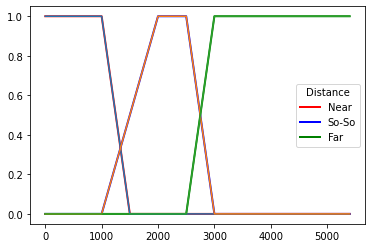

In [ ]:
#Distance m.f.s
near = fuzz.trapmf(distance, [-1,0,1000,1500])
soso = fuzz.trapmf(distance, [1000,2000,2500,3000])
far = fuzz.trapmf(distance, [2500,3000,5500,5501])

plt.plot(distance, near, linewidth=2, label="Near", color="red")
plt.plot(distance, soso, linewidth=2, label="So-So", color="blue")
plt.plot(distance, far, linewidth=2, label="Far", color="green")

plt.legend(title='Distance')
plt.plot(distance, near, distance, soso, distance, far)

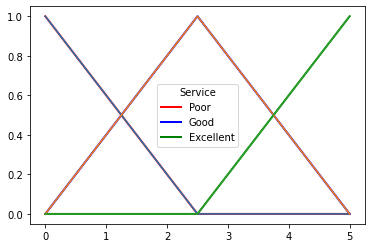

In [ ]:
#Service m.f.s
poor = fuzz.trimf(svc, [0, 0, 2.5])
good = fuzz.trimf(svc, [0, 2.5, 5])
excellent = fuzz.trimf(svc, [2.5, 5, 5])

plt.plot(svc, poor, linewidth=2, label="Poor", color="red")
plt.plot(svc, good, linewidth=2, label="Good", color="blue")
plt.plot(svc, excellent, linewidth=2, label="Excellent", color="green")

plt.legend(title='Service')
plt.plot(svc, poor, svc, good, svc, excellent)

#Problem: Plot color not coordinate with label

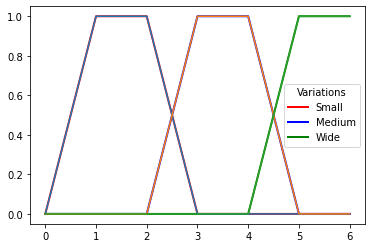

In [ ]:
#Variations m.f.s
small = fuzz.trapmf(var, [0, 1, 2, 3])
medium = fuzz.trapmf(var, [2, 3, 4, 5])
wide = fuzz.trapmf(var, [4, 5, 6, 6])

plt.plot(var, small, linewidth=2, label="Small", color="red")
plt.plot(var, medium, linewidth=2, label="Medium", color="blue")
plt.plot(var, wide, linewidth=2, label="Wide", color="green")

plt.legend(title='Variations')
plt.plot(var, small, var, medium, var, wide)

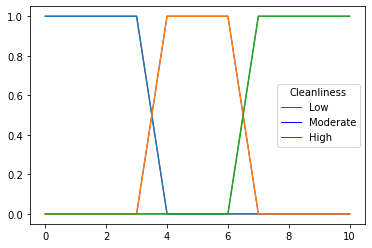

In [ ]:
#Cleanliness level m.f.s
low = fuzz.trapmf(cln, [0, 0, 3, 4])
average = fuzz.trapmf(cln, [3, 4, 6, 7])
high = fuzz.trapmf(cln, [6, 7, 10, 10]) 

plt.plot(cln, low, linewidth = 1, label = "Low", color = "Red")
plt.plot(cln, average, linewidth = 1, label = "Moderate", color = "Blue")
plt.plot(cln, high, linewidth = 1, label = "High", color = "Green")

plt.legend(title = "Cleanliness")
plt.plot(cln, low, cln, average, cln, high)

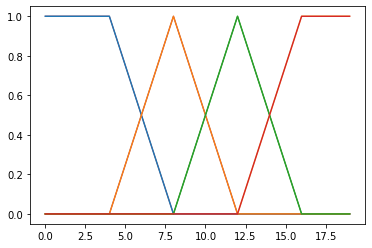

In [ ]:
#Recommendation m.f.s
unrec = fuzz.trapmf(recom,[-1,0,4,8])
leastrec = fuzz.trimf(recom,[4,8,12])
rec = fuzz.trimf(recom,[8,12,16])
highrec = fuzz.trapmf(recom,[12,16,20,21])

plt.plot(recom, unrec, linewidth = 1, label = "Unrecommended", color = "Red")
plt.plot(recom, leastrec, linewidth = 1, label = "Least Recommended", color = "Blue")
plt.plot(recom, rec, linewidth = 1, label = "Recommended", color = "Green")
plt.plot(recom, highrec, linewidth = 1, label = "Highly Recommended", color = "Yellow")

plt.plot(recom, unrec, recom, leastrec, recom, rec, recom, highrec)

## RULES

In [ ]:
#List of Rules


scores = np.empty(6)
for x in range(0,6):
  distance_val = distances[x][location-1]
  service_val = service[x]
  variation_val = variation[x]
  cleanliness_val = cleanliness[x]

  #Rule 1: IF service is POOR, THEN recommendation is UNRECOMMENDED
  is_poor = fuzz.interp_membership(svc, poor, service_val)
  fire_rule_1 = is_poor
  r1_out = np.fmin(fire_rule_1, unrec)

  #Rule 2: IF cleanliness is LOW, THEN recommendation is UNRECOMMENDED
  is_low = fuzz.interp_membership(cln, low, cleanliness_val)
  fire_rule_2 = is_low
  r2_out = np.fmin(fire_rule_2,unrec)
  output = np.fmax(r1_out,r2_out)

  #Rule 3: IF distance is NEAR AND service is GOOD AND variations is SMALL, THEN recommendation is RECOMMENDED
  is_near = fuzz.interp_membership(distance, near, distance_val)
  is_good = fuzz.interp_membership(svc, good, service_val)
  is_small = fuzz.interp_membership(var, small, variation_val)
  fire_rule_3 = min(is_near,is_good,is_small)
  r3_out = np.fmin(fire_rule_3,rec)
  output = np.fmax(r3_out,output)

  #RULE 4: IF distance is NEAR AND service is GOOD AND variations is MEDIUM, THEN recommendation is RECOMMENDED
  is_medium = fuzz.interp_membership(var, medium, variation_val)
  fire_rule_4 = min(is_near,is_good,is_medium)
  r4_out = np.fmin(fire_rule_4,rec)
  output = np.fmax(r4_out,output)

  #Rule 5: IF distance is NEAR AND service is EXCELLENT, THEN recommendation is HIGHLY RECOMMENDED
  is_excellent = fuzz.interp_membership(svc, excellent, service_val)
  fire_rule_5 = min(is_near,is_excellent)
  r5_out = np.fmin(fire_rule_5,highrec)
  output = np.fmax(r5_out,output)

  #Rule 6: IF distance is SO-SO AND service is GOOD AND variations is MEDIUM AND cleanliness is AVERAGE, THEN recommendation is RECOMMENDED
  is_soso = fuzz.interp_membership(distance, soso, distance_val)
  is_average = fuzz.interp_membership(cln, average, cleanliness_val)
  fire_rule_6 = min(is_soso,is_good,is_medium,is_average)
  r6_out = np.fmin(fire_rule_6,rec)
  output = np.fmax(r6_out,output)

  #Rule 7: IF distance is SO-SO AND service is GOOD AND variations is WIDE AND cleanliness is AVERAGE, THEN recommendation is HIGHLY RECOMMENDED
  is_wide = fuzz.interp_membership(var, wide, variation_val)
  fire_rule_7 = min(is_soso,is_good,is_wide,is_average)
  r7_out = np.fmin(fire_rule_7,highrec)
  output = np.fmax(r7_out,output)

  #Rule 8: IF distance is SO-SO AND service is EXCELLENT AND variations is SMALL, THEN recommendation is LEAST RECOMMENDED
  fire_rule_8 = min(is_soso,is_excellent,is_small)
  r8_out = np.fmin(fire_rule_8,leastrec)
  output = np.fmax(r8_out,output)

  #Rule 9: IF distance is SO-SO AND service is EXCELLENT AND variations is MEDIUM, THEN recommendation is RECOMMENDED
  fire_rule_9 = min(is_soso,is_excellent,is_medium)
  r9_out = np.fmin(fire_rule_9,rec)
  output = np.fmax(r9_out,output)

  #Rule 10: IF distance is SO-SO AND service is EXCELLENT AND variations is WIDE, THEN recommendation is HIGHLY RECOMMENDED
  fire_rule_10 = min(is_soso,is_excellent,is_wide)
  r10_out = np.fmin(fire_rule_10,highrec)
  output = np.fmax(r10_out,output)

  #Rule 11: IF distance is FAR AND variations is SMALL, THEN recommendation is UNRECOMMENDED
  is_far = fuzz.interp_membership(distance, far, distance_val)
  fire_rule_11 = min(is_far,is_small)
  r11_out = np.fmin(fire_rule_11,unrec)
  output = np.fmax(r11_out,output)

  #Rule 12: IF distance is FAR AND variations is MEDIUM, THEN recommendation is UNRECOMMENDED
  fire_rule_12 = min(is_far,is_medium)
  r12_out = np.fmin(fire_rule_12,unrec)
  output = np.fmax(r12_out,output)

  #Rule 13: IF distance is FAR AND service is GOOD AND variations is WIDE AND cleanliness is AVERAGE, THEN recommendation is RECOMMENDED
  fire_rule_13 = min(is_far,is_good,is_wide,is_average)
  r13_out = np.fmin(fire_rule_13,rec)
  output = np.fmax(r13_out,output)

  #Rule 14: IF distance is FAR AND service is EXCELLENT AND variations is WIDE, THEN recommendation is RECOMMENDED
  fire_rule_14 = min(is_far,is_excellent,is_wide,is_average)
  r14_out = np.fmin(fire_rule_14,rec)
  output = np.fmax(r14_out,output)

  #Rule 15: IF distance is NEAR AND service is GOOD AND variations is WIDE, THEN recommendation is HIGHLY RECOMMENDED
  fire_rule_15 = min(is_near,is_good,is_wide)
  r15_out = np.fmin(fire_rule_15,highrec)
  output = np.fmax(r15_out,output)

  #Defuzzification
  scores[x] = fuzz.defuzz(recom, output, mode ='mom')

## OUTPUT

In [ ]:
most = max(scores)
print('The most recommended place is',zones[np.where(scores==most)])

d = input('Do you want to know the scores for all zones? [Y/N]')

if d=='Y':
  print('Scores for ZONE 1 - 6, sequentially')
  print(scores)

print('Thank you!')

The most recommended place is ['ZONE 4']
Do you want to know the scores for all zones? [Y/N]N
Thank you!
